In [4]:
import sys
import os
sys.path.append(os.path.abspath('../'))


from scripts.data_loader import load_data
from scripts.data_cleaning import merge_all

data = load_data()
mf = merge_all(data)
mf.head()

,sale_id,sale_date,store_id,product_id,quantity,Product_ID,Product_Name,Category_ID,Launch_Date,Price,Store_ID,Store_Name,City,Country,category_id,category_name,claim_id,claim_date,repair_status
0,YG-8782,16-06-2023,ST-10,P-38,10,P-38,iPhone 13 Pro,CAT-4,2021-03-22,308,ST-10,Apple South Coast Plaza,Costa Mesa,United States,CAT-4,Smartphone,CL-58750,2024-01-30,Completed
1,QX-999001,13-04-2022,ST-63,P-48,10,P-48,Apple Watch Nike Edition,CAT-5,2020-06-24,884,ST-63,Apple Parque La Colina,Bogota,Colombia,CAT-5,Wearable,CL-8874,2024-06-25,Pending
2,JG-46890,05-07-2021,ST-26,P-79,5,P-79,Magic Trackpad,CAT-10,2024-05-25,1242,ST-26,Apple Leidseplein,Amsterdam,Netherlands,CAT-10,Accessories,CL-14486,2024-08-13,Pending
3,XJ-1731,20-07-2022,ST-15,P-24,9,P-24,iPad mini (6th Generation),CAT-3,2022-11-27,573,ST-15,Apple Downtown Brooklyn,Brooklyn,United States,CAT-3,Tablet,CL-42187,2024-09-19,Pending
4,FG-95080,18-03-2022,ST-35,P-69,7,P-69,Apple TV+,CAT-8,2024-11-04,404,ST-35,Apple Shanghai IFC,Shanghai,China,CAT-8,Subscription Service,CL-37590,2024-09-16,Completed


In [5]:
mf.info


<bound method DataFrame.info of            sale_id   sale_date store_id product_id  quantity Product_ID  \
0          YG-8782  16-06-2023    ST-10       P-38        10       P-38   
1        QX-999001  13-04-2022    ST-63       P-48        10       P-48   
2         JG-46890  05-07-2021    ST-26       P-79         5       P-79   
3          XJ-1731  20-07-2022    ST-15       P-24         9       P-24   
4         FG-95080  18-03-2022    ST-35       P-69         7       P-69   
...            ...         ...      ...        ...       ...        ...   
1040195   BU-93576  06-01-2023    ST-38       P-29        10       P-29   
1040196    ZC-5827  30-03-2023    ST-37       P-31         6       P-31   
1040197  WP-514458  01-11-2022    ST-65       P-29         9       P-29   
1040198  OM-043584  28-03-2024    ST-28       P-45         6       P-45   
1040199    FJ-0643  20-07-2022    ST-50       P-59         1       P-59   

                       Product_Name Category_ID Launch_Date  Price 

In [6]:
mf.info

<bound method DataFrame.info of            sale_id   sale_date store_id product_id  quantity Product_ID  \
0          YG-8782  16-06-2023    ST-10       P-38        10       P-38   
1        QX-999001  13-04-2022    ST-63       P-48        10       P-48   
2         JG-46890  05-07-2021    ST-26       P-79         5       P-79   
3          XJ-1731  20-07-2022    ST-15       P-24         9       P-24   
4         FG-95080  18-03-2022    ST-35       P-69         7       P-69   
...            ...         ...      ...        ...       ...        ...   
1040195   BU-93576  06-01-2023    ST-38       P-29        10       P-29   
1040196    ZC-5827  30-03-2023    ST-37       P-31         6       P-31   
1040197  WP-514458  01-11-2022    ST-65       P-29         9       P-29   
1040198  OM-043584  28-03-2024    ST-28       P-45         6       P-45   
1040199    FJ-0643  20-07-2022    ST-50       P-59         1       P-59   

                       Product_Name Category_ID Launch_Date  Price 

In [7]:
print(mf.columns.tolist())

['sale_id', 'sale_date', 'store_id', 'product_id', 'quantity', 'Product_ID', 'Product_Name', 'Category_ID', 'Launch_Date', 'Price', 'Store_ID', 'Store_Name', 'City', 'Country', 'category_id', 'category_name', 'claim_id', 'claim_date', 'repair_status']


In [8]:
# 👀 عرض الأعمدة الأصلية
print("🔹 Original columns:")
print(mf.columns.tolist())

# ✅ توحيد أسماء الأعمدة (lowercase + إزالة المسافات)
mf.columns = mf.columns.str.strip().str.lower()

# ✅ إزالة الأعمدة المكررة بعد التوحيد
mf = mf.loc[:, ~mf.columns.duplicated()]

# 👀 عرض الأعمدة بعد التنظيف
print("\n✅ Cleaned column names:")
print(mf.columns.tolist())



🔹 Original columns:
['sale_id', 'sale_date', 'store_id', 'product_id', 'quantity', 'Product_ID', 'Product_Name', 'Category_ID', 'Launch_Date', 'Price', 'Store_ID', 'Store_Name', 'City', 'Country', 'category_id', 'category_name', 'claim_id', 'claim_date', 'repair_status']

✅ Cleaned column names:
['sale_id', 'sale_date', 'store_id', 'product_id', 'quantity', 'product_name', 'category_id', 'launch_date', 'price', 'store_name', 'city', 'country', 'category_name', 'claim_id', 'claim_date', 'repair_status']


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# إعداد المظهر العام للرسومات
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10,6)


d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


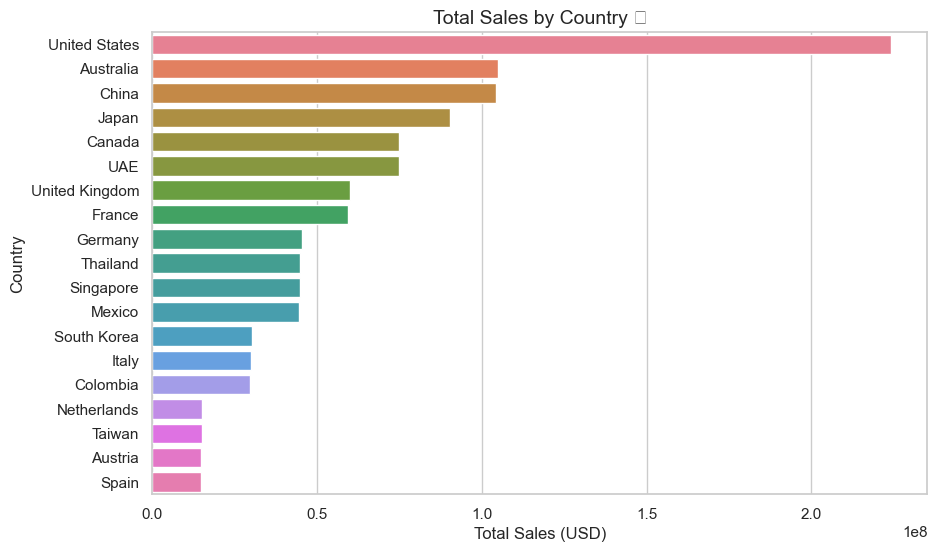

In [11]:
sales_by_country = mf.groupby('country')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_country.values, y=sales_by_country.index, hue=sales_by_country.index, dodge=False, legend=False)
plt.title("Total Sales by Country 🌍", fontsize=14)
plt.xlabel("Total Sales (USD)")
plt.ylabel("Country")
plt.show()


d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


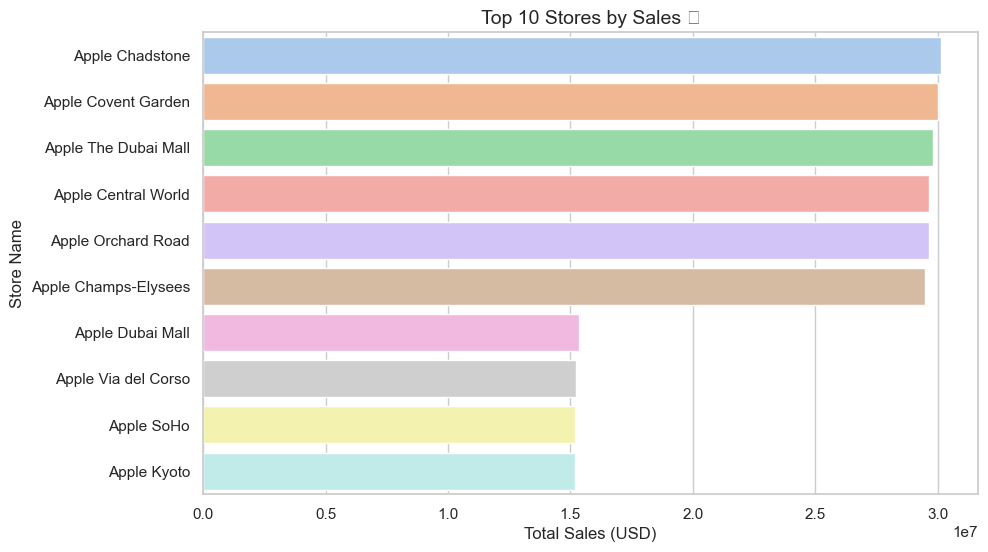

In [12]:
top_stores = mf.groupby('store_name')['price'].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_stores.values, y=top_stores.index, hue=top_stores.index, dodge=False, legend=False)
plt.title("Top 10 Stores by Sales 🏬", fontsize=14)
plt.xlabel("Total Sales (USD)")
plt.ylabel("Store Name")
plt.show()


C:\Users\20155\AppData\Local\Temp\ipykernel_30068\2486619403.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  mf['sale_date'] = pd.to_datetime(mf['sale_date'], errors='coerce')
C:\Users\20155\AppData\Local\Temp\ipykernel_30068\2486619403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf['sale_date'] = pd.to_datetime(mf['sale_date'], errors='coerce')
d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 1

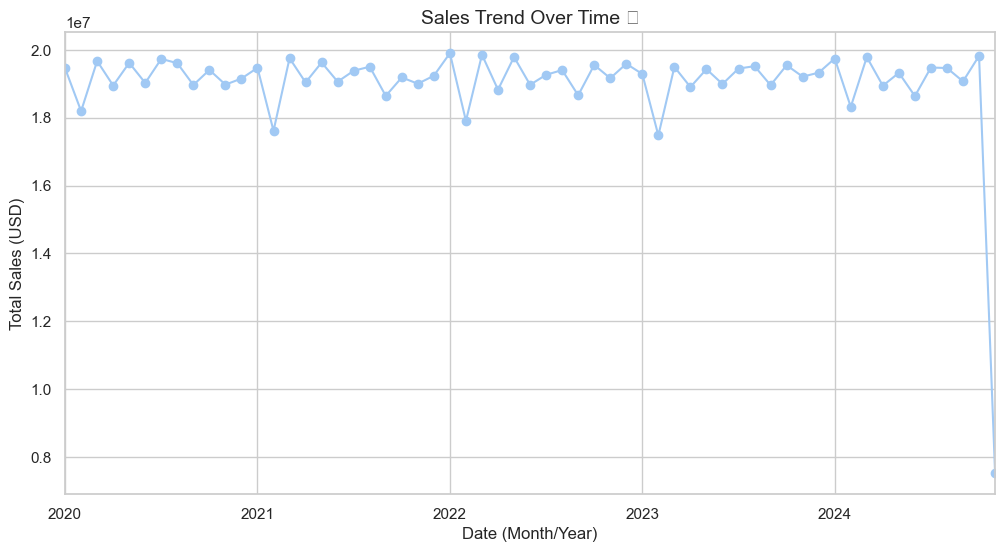

In [13]:
# Ensure sale_date is datetime
mf['sale_date'] = pd.to_datetime(mf['sale_date'], errors='coerce')

# Monthly aggregation
sales_over_time = mf.groupby(mf['sale_date'].dt.to_period('M'))['price'].sum()

plt.figure(figsize=(12,6))
sales_over_time.plot(kind='line', marker='o')
plt.title("Sales Trend Over Time 📈", fontsize=14)
plt.xlabel("Date (Month/Year)")
plt.ylabel("Total Sales (USD)")
plt.show()


d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


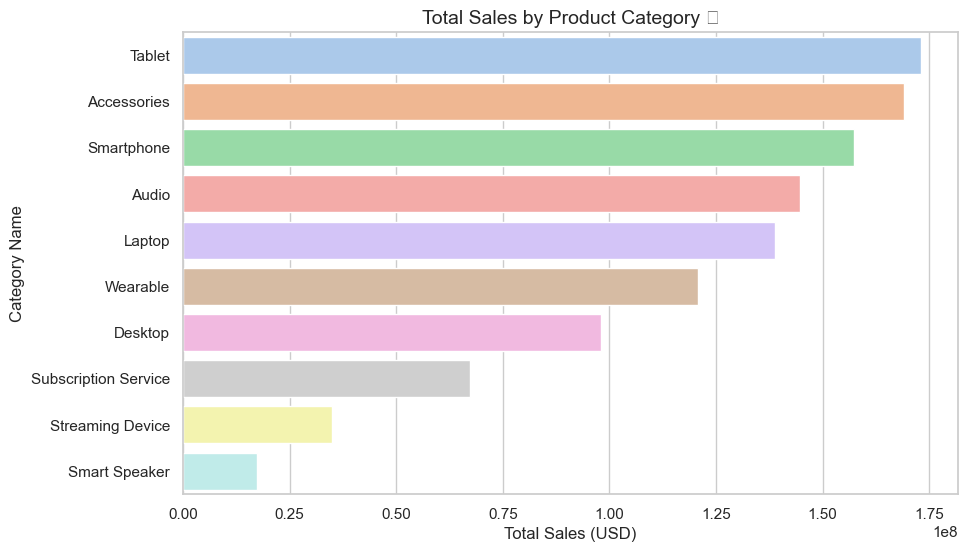

In [14]:
category_sales = mf.groupby('category_name')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.values, y=category_sales.index, hue=category_sales.index, dodge=False, legend=False)
plt.title("Total Sales by Product Category 📦", fontsize=14)
plt.xlabel("Total Sales (USD)")
plt.ylabel("Category Name")
plt.show()


d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


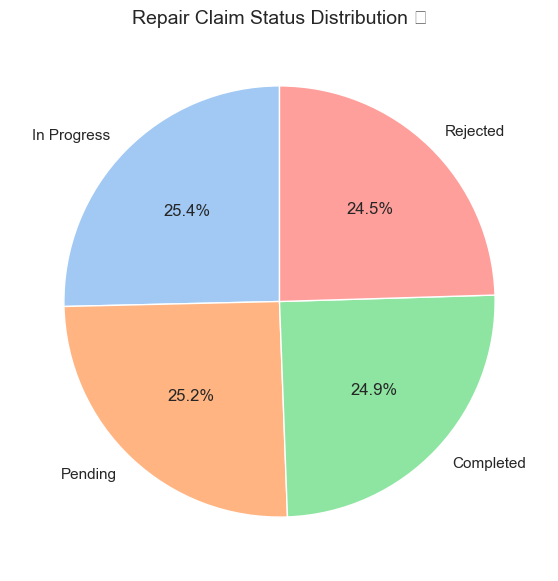

In [15]:
claim_status = mf['repair_status'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(claim_status.values, labels=claim_status.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Repair Claim Status Distribution 🔧", fontsize=14)
plt.show()


d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


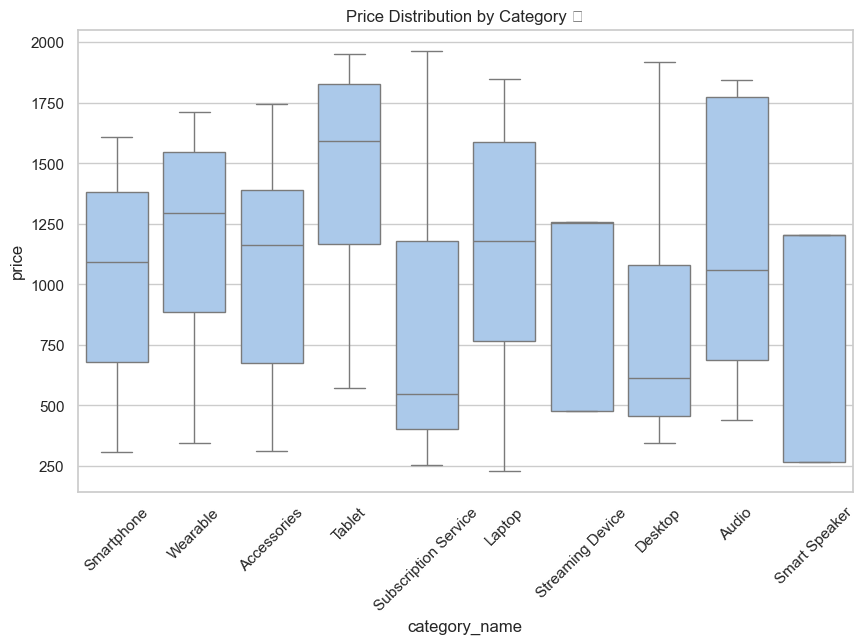

In [16]:
sns.boxplot(x='category_name', y='price', data=mf)
plt.title("Price Distribution by Category 💰")
plt.xticks(rotation=45)
plt.show()


C:\Users\20155\AppData\Local\Temp\ipykernel_30068\3612019649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf['Weekday'] = mf['sale_date'].dt.day_name()
C:\Users\20155\AppData\Local\Temp\ipykernel_30068\3612019649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf['Month'] = mf['sale_date'].dt.month_name()
d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


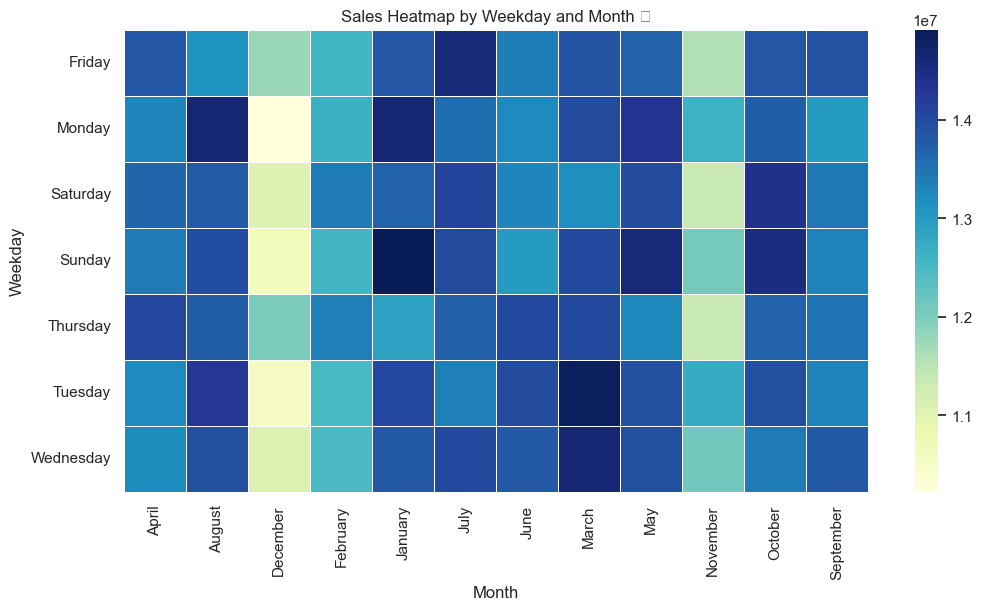

In [17]:
mf['Weekday'] = mf['sale_date'].dt.day_name()
mf['Month'] = mf['sale_date'].dt.month_name()

sales_heatmap = mf.pivot_table(values='price', index='Weekday', columns='Month', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(sales_heatmap, cmap="YlGnBu", linewidths=0.5)
plt.title("Sales Heatmap by Weekday and Month 🔥")
plt.show()


d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


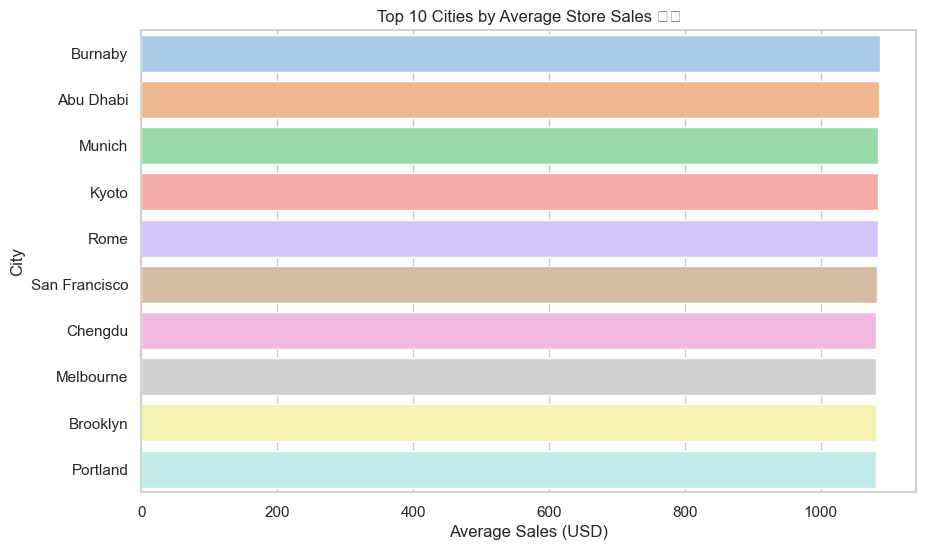

In [18]:
avg_city_sales = mf.groupby('city')['price'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_city_sales.values, y=avg_city_sales.index, hue=avg_city_sales.index, legend=False, dodge=False)
plt.title("Top 10 Cities by Average Store Sales 🏙️")
plt.xlabel("Average Sales (USD)")
plt.ylabel("City")
plt.show()


d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


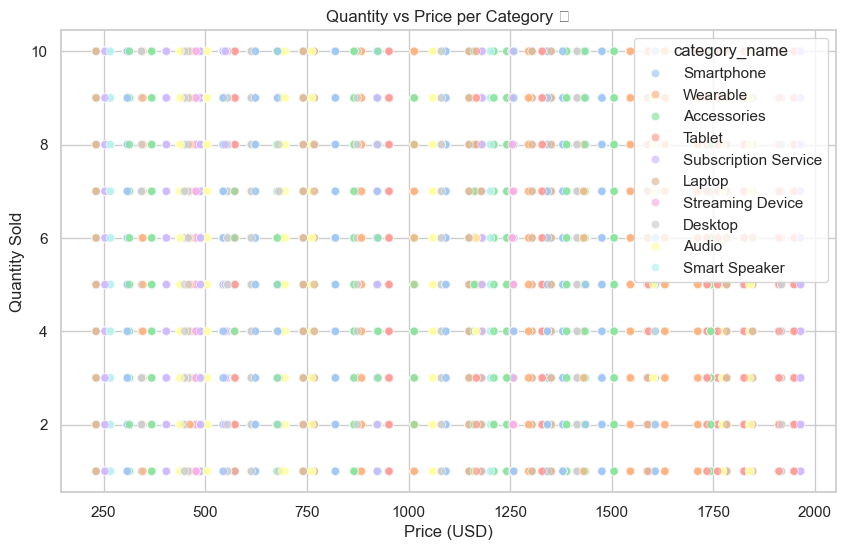

In [19]:
sns.scatterplot(x='price', y='quantity', data=mf, hue='category_name', alpha=0.7)
plt.title("Quantity vs Price per Category 📊")
plt.xlabel("Price (USD)")
plt.ylabel("Quantity Sold")
plt.show()


d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9881 (\N{GEAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


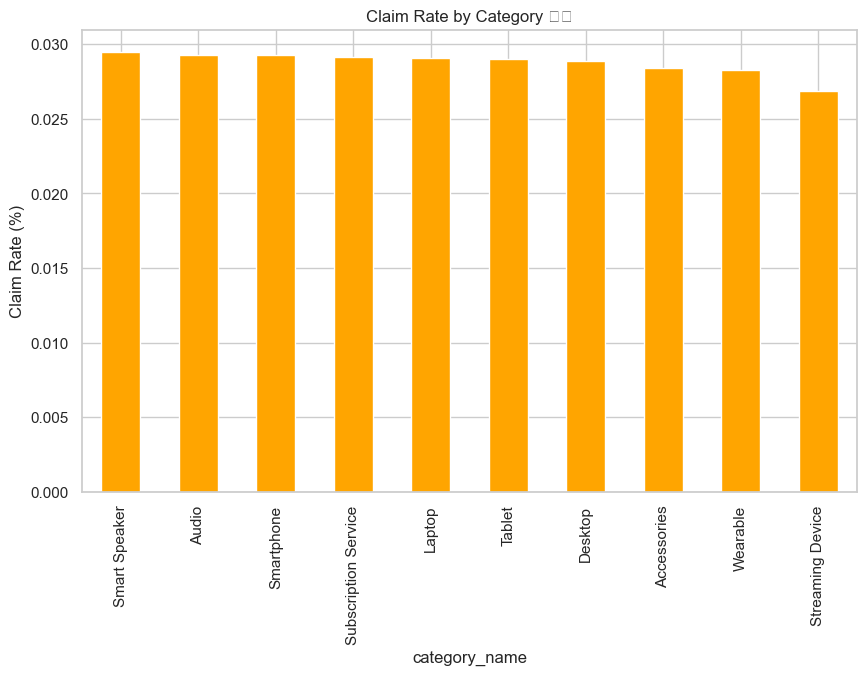

In [20]:
claim_rate = mf.groupby('category_name')['claim_id'].count() / mf.groupby('category_name')['sale_id'].count()

claim_rate.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Claim Rate by Category ⚙️")
plt.ylabel("Claim Rate (%)")
plt.show()


C:\Users\20155\AppData\Local\Temp\ipykernel_30068\3167235768.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category_name', y='price', hue='country', data=filtered, ci=None)
d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


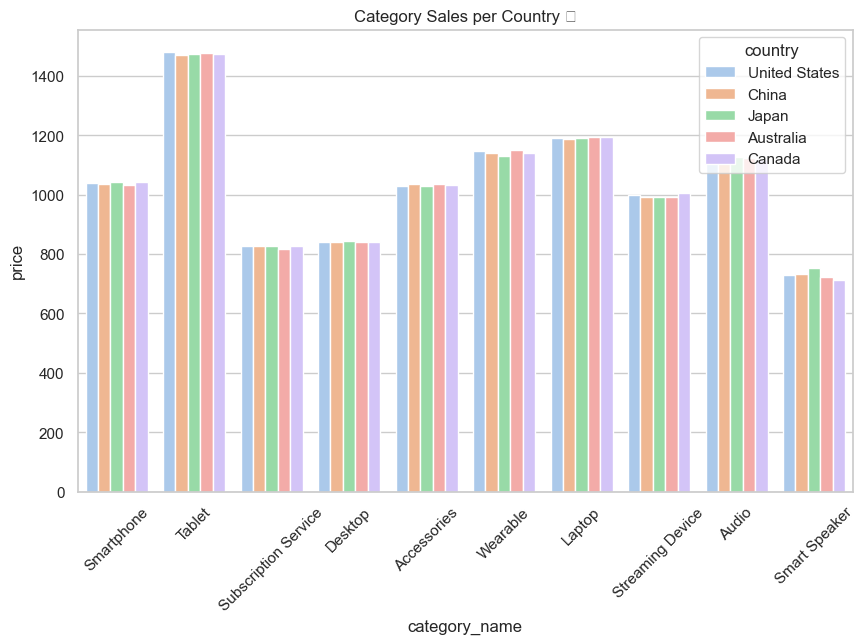

In [21]:
top_countries = mf['country'].value_counts().head(5).index
filtered = mf[mf['country'].isin(top_countries)]

sns.barplot(x='category_name', y='price', hue='country', data=filtered, ci=None)
plt.title("Category Sales per Country 🌍")
plt.xticks(rotation=45)
plt.show()


d:\kosom el swe\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


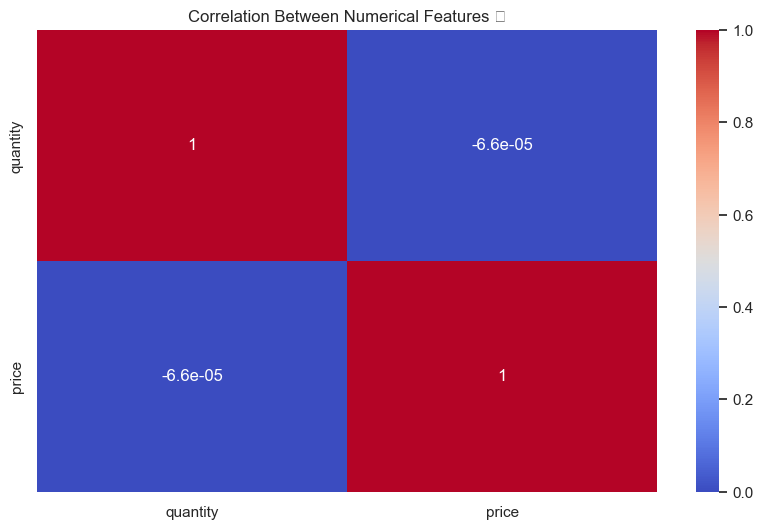

In [22]:
corr = mf[['quantity', 'price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features 📈")
plt.show()
